In [1]:
# --- paths (run this first) ---
from pathlib import Path
NB   = Path.cwd()
PROJ = NB.parent
REPO = PROJ.parents[1]

DATA_IN  = PROJ / "data_in"
DOCS     = PROJ / "docs"
SRC      = PROJ / "src"
TESTS    = PROJ / "tests"

OUT_DATA = REPO / "outputs" / "data"
OUT_PROJ = OUT_DATA / "eda_ga"

for p in [DATA_IN, DOCS, SRC, TESTS, OUT_DATA, OUT_PROJ]:
    p.mkdir(parents=True, exist_ok=True)

print("PROJ:", PROJ)
print("OUT_PROJ:", OUT_PROJ)


PROJ: C:\Users\sgrant06\Desktop\data-analytics-portfolio\projects\eda_ga
OUT_PROJ: C:\Users\sgrant06\Desktop\data-analytics-portfolio\outputs\data\eda_ga


In [2]:
"""
import pandas as pd
from pathlib import Path

# Load the cleaned data produced by the Cleaning GA notebook
CLEAN_OUT = Path('C:/Users/sgrant06/Desktop/data-analytics-portfolio/outputs/data/cleaning_ga/cleaned.csv')
clean = pd.read_csv(CLEAN_OUT)
# (optional) Alias to the name your plotting code uses
df = clean  # or just use `clean` everywhere below
"""


"\nimport pandas as pd\nfrom pathlib import Path\n\n# Load the cleaned data produced by the Cleaning GA notebook\nCLEAN_OUT = Path('C:/Users/sgrant06/Desktop/data-analytics-portfolio/outputs/data/cleaning_ga/cleaned.csv')\nclean = pd.read_csv(CLEAN_OUT)\n# (optional) Alias to the name your plotting code uses\ndf = clean  # or just use `clean` everywhere below\n"

In [3]:
import pandas as pd
from pathlib import Path

# find the repo root by walking up until we see a .git folder
def find_repo_root(start: Path = None):
    p = (start or Path.cwd()).resolve()
    for parent in [p, *p.parents]:
        if (parent / ".git").exists():
            return parent
    raise FileNotFoundError("Could not find repo root")

REPO = find_repo_root()
CLEAN_OUT = REPO / "outputs" / "data" / "cleaning_ga" / "cleaned.csv"

print("Using:", CLEAN_OUT)
assert CLEAN_OUT.exists(), "Cleaned CSV not found at expected path"

clean = pd.read_csv(CLEAN_OUT)
df = clean  # or just use `clean` below


Using: C:\Users\sgrant06\Desktop\data-analytics-portfolio\outputs\data\cleaning_ga\cleaned.csv


In [4]:
"""
from pathlib import Path
import pandas as pd

# Notebook -> .../projects/eda_ga/notebooks
NB = Path.cwd()
PROJ = NB.parents[1]              # .../projects/eda_ga
REPO = NB.parents[3]              # repo root: .../data-analytics-portfolio

# Where the Cleaning project wrote its output
CLEAN_OUT = REPO / "outputs" / "data" / "cleaning_ga" / "cleaned.csv"
clean = pd.read_csv(CLEAN_OUT)
"""
# Where this EDA page and images will live (GitHub Pages)
PAGES = REPO / "docs" / "eda_ga"
PAGES.mkdir(parents=True, exist_ok=True)


In [5]:
# libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the cleaned data from your Cleaning project
CLEANED = REPO / "outputs" / "data" / "cleaning_ga" / "cleaned.csv"
df = pd.read_csv(CLEAN_OUT)

df.head()
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    2 non-null      object 
 1   age     1 non-null      float64
 2   joined  1 non-null      object 
dtypes: float64(1), object(2)
memory usage: 180.0+ bytes


,name,age,joined
count,2,1.0,1
unique,2,NaN,1
top,Ana,NaN,2023-01-05
freq,1,NaN,1
mean,NaN,28.0,NaN
std,NaN,NaN,NaN
min,NaN,28.0,NaN
25%,NaN,28.0,NaN
50%,NaN,28.0,NaN
75%,NaN,28.0,NaN


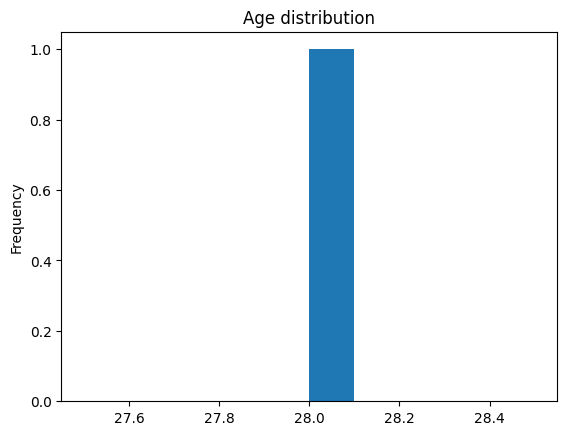

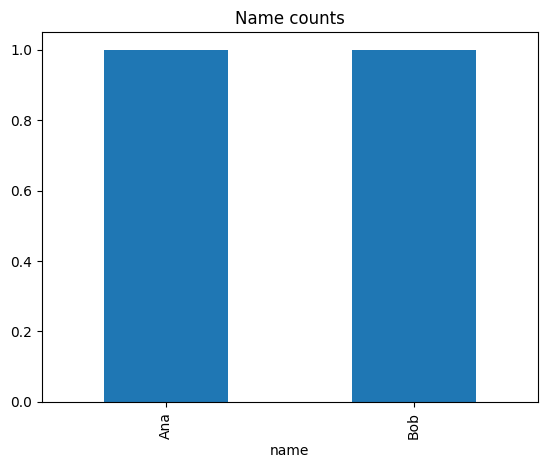

In [6]:
df['age'].plot(kind='hist', bins=10, title='Age distribution')
plt.show()

df['name'].value_counts(dropna=False).plot(kind='bar', title='Name counts')
plt.show()


In [7]:
"""
import matplotlib.pyplot as plt
# ...your plots...
fig1.savefig("../../docs/eda_ga/age_hist.png", dpi=200, bbox_inches="tight")
fig2.savefig("../../docs/eda_ga/name_counts.png", dpi=200, bbox_inches="tight")
"""

'\nimport matplotlib.pyplot as plt\n# ...your plots...\nfig1.savefig("../../docs/eda_ga/age_hist.png", dpi=200, bbox_inches="tight")\nfig2.savefig("../../docs/eda_ga/name_counts.png", dpi=200, bbox_inches="tight")\n'

In [8]:
"""
import matplotlib.pyplot as plt

# Age histogram
fig1, ax1 = plt.subplots()
ax1.hist(df["age"].dropna(), bins=10)
ax1.set_title("Age distribution")

# Name counts
fig2, ax2 = plt.subplots()
df["name"].value_counts().plot(kind="bar", ax=ax2)
ax2.set_title("Name counts")

# save images into docs for the EDA page
EDA_DOCS = REPO / "docs" / "eda_ga"
EDA_DOCS.mkdir(parents=True, exist_ok=True)
fig1.savefig(EDA_DOCS / "age_hist.png", dpi=200, bbox_inches="tight")
fig2.savefig(EDA_DOCS / "name_counts.png", dpi=200, bbox_inches="tight")
"""

'\nimport matplotlib.pyplot as plt\n\n# Age histogram\nfig1, ax1 = plt.subplots()\nax1.hist(df["age"].dropna(), bins=10)\nax1.set_title("Age distribution")\n\n# Name counts\nfig2, ax2 = plt.subplots()\ndf["name"].value_counts().plot(kind="bar", ax=ax2)\nax2.set_title("Name counts")\n\n# save images into docs for the EDA page\nEDA_DOCS = REPO / "docs" / "eda_ga"\nEDA_DOCS.mkdir(parents=True, exist_ok=True)\nfig1.savefig(EDA_DOCS / "age_hist.png", dpi=200, bbox_inches="tight")\nfig2.savefig(EDA_DOCS / "name_counts.png", dpi=200, bbox_inches="tight")\n'

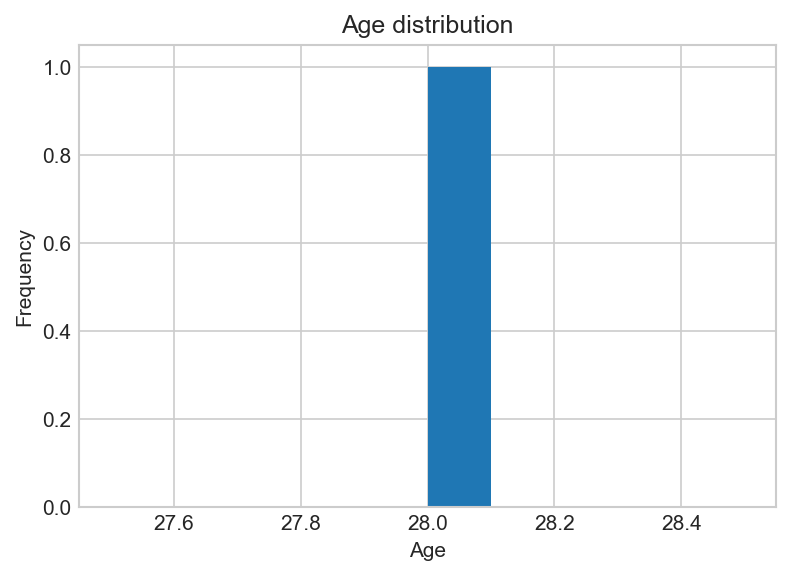

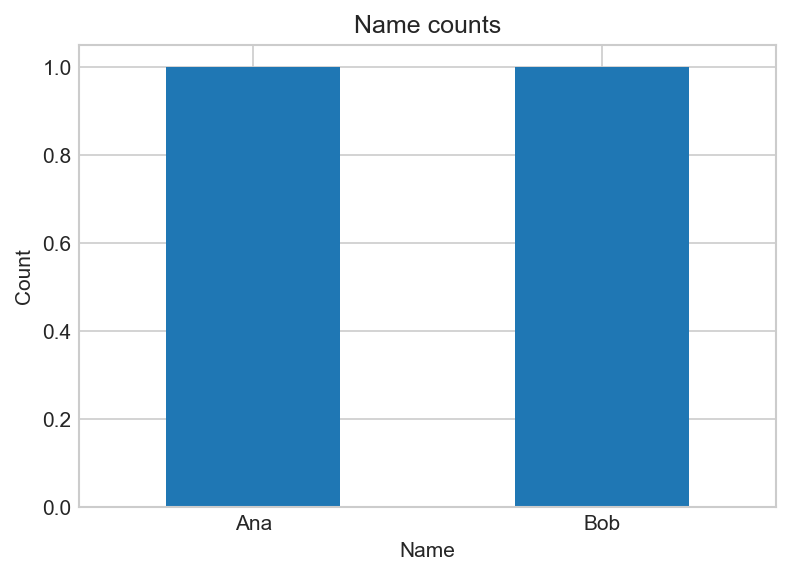

In [9]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")  # optional styling

# --- Age distribution ---
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=150)
ax1.hist(clean["age"].dropna(), bins=10)
ax1.set_title("Age distribution")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

(fig1).savefig(PAGES / "age_hist.png", dpi=200, bbox_inches="tight")

# --- Name counts ---
fig2, ax2 = plt.subplots(figsize=(6,4), dpi=150)
clean["name"].value_counts(dropna=False).plot(kind="bar", ax=ax2, rot=0)
ax2.set_title("Name counts")
ax2.set_xlabel("Name")
ax2.set_ylabel("Count")

(fig2).savefig(PAGES / "name_counts.png", dpi=200, bbox_inches="tight")


In [10]:
"""
# Write docs page for EDA GA
index_md = PAGES / "index.md"
index_md.write_text(
"""---
title: EDA GA — Quick look
---

**EDA GA — Quick look**

- Small demo EDA with two quick visuals.

![Histogram of ages](age_hist.png)
![Bar chart of name counts](name_counts.png)

[View the source notebook](https://github.com/sharonegrant/data-analytics-portfolio/blob/main/projects/eda_ga/notebooks/01_eda.ipynb)
""",
encoding="utf-8"
)
index_md
"""

SyntaxError: invalid character '—' (U+2014) (1682833719.py, line 6)

In [ ]:
index_md = PAGES / "index.md"
index_md.write_text(
f"""---
title: EDA GA — Quick look
---

- **Back to portfolio home:** [/data-analytics-portfolio/](/data-analytics-portfolio/)
- **Cleaning GA — Profile:** [/data-analytics-portfolio/cleaning_ga/](/data-analytics-portfolio/cleaning_ga/)

### Age distribution
![Age distribution](/data-analytics-portfolio/eda_ga/age_hist.png)

### Name counts
![Name counts](/data-analytics-portfolio/eda_ga/name_counts.png)
""",
encoding="utf-8"
)
index_md
